# Stroop Effect

## Introduction

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: 

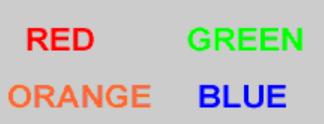

In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: 

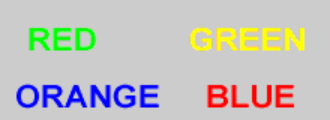

In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition [1], [2].


### Self experiment

- Congruent task: 14.749 s
- Incongruent task: 25.639


## 1. Identify variables in the experiment

The independent variable is the condition of the task (are colours and names congruent or incongruent). 
The dependent variable is the time in seconds to name the _colours_ of all words. 

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? 

The population parameters (mean, variance) are unknown. An appropriate test for this situation
is a t-test.

The experiment is a "within-subject design" with two conditions. I will perform a t-test for the difference $x_D = x_I - x_C$.

I will perform a one-sided test. 

Null hypothesis: The time for the incongruent condition is not significantly longer than
for the congruent condition. 

$H_0: \mu_I <= \mu_C \quad (\mu_D <= 0)$

Alternative hypothesis: The incongruent condition take significantly longer.

$H_A: \mu_I > \mu_C \quad (\mu_D > 0)$


* $x_C$ ... time (in s) to name the colours, congruent condition
* $x_I$ ... time (in s) to name the colours, incongruent condition
* $x_D = x_I - x_C$ ... time difference (in s) between congruent and incongruent condition
* $\mu_C$ is the population mean of the time to name all colours in the congruent condition.
* $\mu_I$ is the population mean of the time to name all colours in the incongruent condition.
* $\mu_D$ is the population mean of the time difference.

### Assumptions for t test

- distribution of $\mu_D$ should be approximately normal
- the sample data can be used to estimate the population variance

## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import math

In [2]:
stroopdata = pd.read_csv("stroopdata.csv")
stroopdata['Difference'] = stroopdata.Incongruent - stroopdata.Congruent
stroopdata.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


## 4. Plot the data


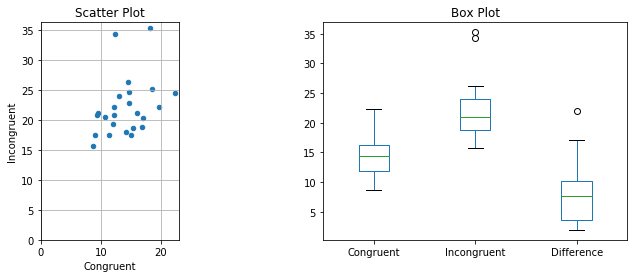

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
stroopdata.plot(x="Congruent", y="Incongruent", kind="scatter", ax=ax1)
ax1.grid(True)
ax1.set_xlim(0)
ax1.set_ylim(0)
ax1.set_aspect("equal")
ax1.set_title("Scatter Plot")

stroopdata.plot(kind='box', ax=ax2, title="Box Plot");

### Observations

* The scatter plot suggests a correlation between the time for congruent and incongruent tasks.
* The box plots visualise the distribution of times for congruent and incongruent tasks, and the 
  difference between them. The distributions are more or less symmetrical, which is an assumption 
  of the t-test. 

## 5. Perform the statistical test and interpret your results



In [4]:
alpha = 0.05       # significance level for t test
conf_level = 0.95  # confidence coefficient for interval

print("alpha = %.3f" % alpha)

# length of sample
n = len(stroopdata.Difference)
print("Sample size n = %g" % n)

# point estimate for mu_d
xbar_d = stroopdata.Difference.mean()
print("Sample mean = %.3f" % xbar_d)

# Standard deviation of difference
s = stroopdata.Difference.std(ddof=1)
print("Sample standard deviation = %.3f" % s)

# standard error of mean
sem = s / np.sqrt(n)
print("Standard error of mean = %.3f" % sem)

# t statistic
t = xbar_d / sem
print("T statistic = %.3f" % t)

# t critical, 0.05, one-sided
ndof = n - 1
print("df = %g" % ndof)
tcrit = stats.t.ppf(1-alpha, ndof)
print("t_critical = %.3f" % tcrit)

# probability of getting this mean
p = 1 - stats.t.cdf(t, ndof) # that's low.
print("p-value = %.3e" % p)

# reject h0?
if p < alpha:
    print("Reject H0")
else: 
    print("Accept H0")

# effect size: cohens d
dco = xbar_d/s
print("Cohen's d = %.3f" % dco)

# coefficient of determination
r2 = t**2 / (t**2 + ndof)
print("r2 = %.3f" % r2)

# confidence interval for mean
tstar = stats.t.ppf(1-conf_level/2, ndof)
print("t* = %.3f" % tstar)

# margin of error
me = tstar*sem
print("Margin of error = %.3f" % me)

# confidence interval
print("%.0f%% confidence interval for mean = (%.3f, %.3f)" % (conf_level*100, xbar_d - me, xbar_d + me))

alpha = 0.050
Sample size n = 24
Sample mean = 7.965
Sample standard deviation = 4.865
Standard error of mean = 0.993
T statistic = 8.021
df = 23
t_critical = 1.714
p-value = 2.052e-08
Reject H0
Cohen's d = 1.637
r2 = 0.737
t* = 0.063
Margin of error = 0.063
95% confidence interval for mean = (7.902, 8.028)


### Interpretation

The t-test results in a p-value of $2.052 \cdot 10^{-8}$. 
This less than the specified significance level of 0.05. 

I reject the null hypothesis and conclude that time for the incongruent task is significantly longer 
than for the congruent task.

The coefficient of determination, $r^2$ is 0.737. This means that about 74% of the difference in time 
is due to the incongruence between the word and the colour of the word.

Theories on the causes are described in a wikipedia article about the Stroop effect [3]. One theory is that the brain reads words faster than it recognizes colours. 

## References

1. Project instructions: https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True
2. Stroop test app and description: https://faculty.washington.edu/chudler/words.html
3. Wikipedia article on Stroop effect: https://en.wikipedia.org/wiki/Stroop_effect
4. NIST Engineering Statistics Handbook: https://www.itl.nist.gov/div898/handbook/index.htm
5. scipy.stats documentation: https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats